Sprintの目的
スクラッチを通してロジスティック回帰を理解する
分類問題についての基礎を学ぶ

どのように学ぶか
スクラッチでロジスティック回帰を実装した後、学習と検証を行なっていきます。



この下に決定領域の処理を書きます。その他で使用する為


In [61]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
import itertools
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()




【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。



$$
g(z)=   \frac{1}{1 + e^{(−z)}} 
$$


線形回帰の仮定関数は次の式でした。


$$
h_\theta(x) = \theta^T \cdot x.
$$


まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$
g(z)
  = \frac{1}{1 + e^{(−\theta^T \cdot x)}} 
$$



x
 : 特徴量ベクトル


θ
 : パラメータ（重み）ベクトル





sepal_lengthとpetal_lengthのデータフレーム
sepal_lengthとpetal_lengthのndarray
virgicolorとvirginicaのndarray


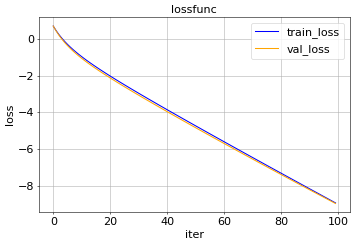

確率推定値 は、  0.9
ラベル予測値 は、  0.9


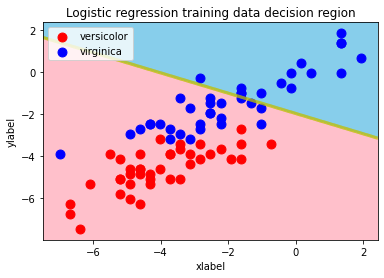

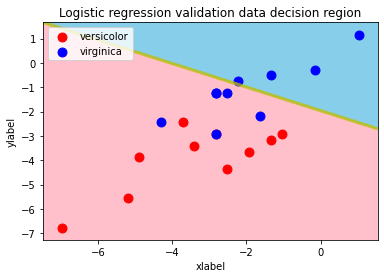

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.47      0.90      0.62        10
           2       0.00      0.00      0.00        10

    accuracy                           0.45        20
   macro avg       0.16      0.30      0.21        20
weighted avg       0.24      0.45      0.31        20



In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import math

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter;
        self.lr = lr;
        self.no_bias = no_bias;
        self.verbose = verbose;
        # 損失を記録する配列を用意
        # self.loss = np.zeros(self.iter)
        # self.loss = self.loss.tolist()
        # self.val_loss = np.zeros(self.iter)
        self.theta = np.array([])  # 初期値
        self.theta2 = np.array([])  # 初期値
        self.loss = np.array([])  # 初期値
        self.val_loss = np.array([])  # 初期値
        # x = np.array( [] )
        self.iter2 = np.array([])  # 初期値
        self.iter2 = self.iter2.tolist()
      

# 問題6（学習と推定）
    def fit(self, X, y, X_val, y_val):
        """
        線形回帰の学習検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        m = X.shape[0]
        hoge = np.ones((m, 1))
        X = np.hstack((hoge,X))

        m2 = X_val.shape[0]
        hoge2 = np.ones((m2, 1))
        X_val = np.hstack((hoge2,X_val))
                            
        self.theta = np.zeros(X.shape[1]) #X.shape[1]：行列Xの列数を表す。np.zeros(X.shape[1])で、列数がX.shape[1]である０だけで構成される行列を作成している
        self.theta = self.theta.reshape(X.shape[1],1) #上記だと１次元配列なので、２次元にする為にreshape(Xの列数＋１（列が全て１の列）,1)にしている
        # print("self.theta")
        # print(self.theta)
        y_true = y
        # print(y_true)
        # print(X)
        self.theta2 = np.zeros(X_val.shape[1]) #X.shape[1]：行列Xの列数を表す。np.zeros(X.shape[1])で、列数がX.shape[1]である０だけで構成される行列を作成している
        self.theta2 = self.theta2.reshape(X_val.shape[1],1) #上記だと１次元配列なので、２次元にする為にreshape(Xの列数＋１（列が全て１の列）,1)にしている
        # print("self.theta")
        # print(self.theta)
        y_true2 = y_val
        # print(y_true)
        # print(X)

        # メイン処理
        for k in range(self.iter):
            # print("イテレーション{}回目".format(k))

            #問題１解答
            h = self._Logistic_hypothesis(X)
            # print("h")
            # print(h)
            h2 = self._Logistic_hypothesis(X_val)
            # print("h2")
            # print(h2)

            # 問題2解答（最急降下法によるパラメータの更新値計算）
            self.theta = self._gradient_descent(X,y_true,h)
            # print("self.theta")
            # print(self.theta)
            self.theta2 = self._gradient_descent(X_val,y_true2,h2)
            # print("self.theta2")
            # print(self.theta2)
           
            # 問題7解答（学習曲線のプロット）のグラフ描画時（問題5（損失関数）で作成した関数を使用）
            #損失関数グラフ化（学習データと検証データ比較）
            if(self.verbose ==True):
              loss= self._loss_func(h, y_true,self.theta)
              loss2= self._loss_func(h2, y_true2,self.theta2)
              self.iter2.append(k)
              self.loss = np.append( self.loss, loss ) #物凄く時間がかかった所。（空ののself.lossにnumpy ndarrayの要素を追加する方法）
              self.val_loss = np.append( self.val_loss, loss2 )
        #figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
        # fig = plt.figure()
        fig=plt.figure(figsize=(20, 5), dpi=50)
        # ax = fig.add_subplot(111)
        #add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
        ax1 = fig.add_subplot(1, 3, 1)
        # ax = plt.axes([0.1, 0.3, 0.8, 0.6])
        
        plt.title("lossfunc",fontsize=16)
        plt.xlabel("iter",fontsize=16)
        plt.ylabel("loss",fontsize=16)
        plt.tick_params(labelsize=16)
        ax1.plot(self.iter2,self.loss, "b", label="train_loss")
        ax1.plot(self.iter2,self.val_loss, "orange", label="val_loss")
        ax1.grid(axis='both')
        # 凡例の表示
        ax1.legend(fontsize=16)
        fig.tight_layout()              #レイアウトの設定
        plt.show()
       



    # 問題1
    def _Logistic_hypothesis(self,X):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        h = 1/(1+math.e ** (-(X @ self.theta)))
        return h

    # 問題2解答
    def _gradient_descent(self,X,y_true,h):
        """
        最急降下法によるパラメータの更新値計算
        適当な重みIrを掛けてθが小さくなる方へ徐々に転がっていくようにする
         X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
         y_true : 入力するモデルの学習に使用する正解値
        Returns
        -------
        hθ(X)=yhθ(X)=yからのズレを定量化してそのズレを最小化するようなθ
        次の値になるθ
        """
        m=X.shape[0] #n_samplesサンプル数
        n=X.shape[1] #n_features特徴量の数
        λ=0.1 #正則化パラメータ
        # print(n)
        for j in range(n):
          gradient0 = 0
          gradient = 0
          for i in range(m): #X.shape[0]は、Xの行数分を表す
            if(j==0):
              gradient0 += (h[i] - y_true[i])*X[i,0]
            elif(j>=1):
              gradient += (h[i] - y_true[i])*X[i,j]
            else:
              pass
          if(j==0):
            self.theta[0] = self.theta[0] - self.lr /(m) * gradient0
          elif(j>=1):
            self.theta[j] = self.theta[j] - self.lr /(m) * (gradient  +λ*self.theta[j])
            pass
          else:
            pass
          """
          ('210801に、この１行(上記のself.theta[j]・・・* gradient )のインデントが上（gradient += ・・・）と同じだった。
          そうすると住宅価格の予測値を出すと膨大な数値なった。原因は、このインデントが間違っていた。
          前に出して修正した。再急降下法の式を見ると、シグマ内にθはないので、前に出さないといけなかった。)
          """
          # print("gradient")
          # print(gradient)
        return self.theta

        


    # 問題3解答
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        m = X.shape[0]
        hoge = np.ones((m, 1))
        X = np.hstack((hoge,X))
                            
        y_pred = self._Logistic_hypothesis(X)
        return y_pred

    def predict(self,X, threshold=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            # 今回の閾値を0.5以上をクラス１、以下をクラス 0とします。
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        return self.predict_proba(X) >= threshold



    # 問題5解答
    def _loss_func(self,h, y_true,theta):
      """
      損失関数の計算
      Parameters
      ----------
      y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
      y : 次の形のndarray, shape (n_samples,)
        正解値
      Returns
      ----------
      lossfunc
        損失値
      """
      # print("y_true")
      # print(y_true)
      m2=y_true.shape[0] #n_samplesサンプル数
      n2=y_true.shape[1] #n_features特徴量の数
      loss_1 =0
      loss_2 =0
      λ=0.1 #正則化パラメータ
      for i in  range(m2):
        # loss += ((h[i] - y_true[i])**2)
        loss_1 += ( - y_true[i]*(math.log(h[i])) -(1-y_true[i]) * (math.log(1-h[i])))
      loss_1 = loss_1/ (m2)
      for j in range(n2):
        loss_2 += theta[j]**2
      loss_2 = λ/(2*m2) * loss_2
      loss = loss_1 + loss_2
      # print("loss2")
      # print(loss2)
      return loss


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
iris_dataset = load_iris()

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import itertools

#説明変数
iris_dataset_data = pd.DataFrame(iris_dataset.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
iris_dataset_all = pd.concat([iris_dataset_data], axis=1)
X = iris_dataset_all
# print(X)
# print(type(X))
#目的変数（花の種類）も同様にyに格納してください。
iris_dataset_target = pd.DataFrame(iris_dataset.target, columns=["Species"])
iris_dataset_all2 = pd.concat([iris_dataset_target], axis=1)
y = iris_dataset_all2

print("sepal_lengthとpetal_lengthのデータフレーム")
x=X.loc[:,['sepal_length','petal_length']]
oldy=y[(y['Species'] == 1) | (y['Species'] == 2)]
#PandasのDataFrameをNumPyのndarrayに変換
print("sepal_lengthとpetal_lengthのndarray")
x=x.loc[50:149,['sepal_length','petal_length']]
X = x.values
X=X.tolist()


#PandasのDataFrameをNumPyのndarrayに変換
print("virgicolorとvirginicaのndarray")
oldy = oldy
y = oldy.values
np.random.seed(1234)

#トレーニングデータとテストデータに分けて実行してみる------------------
X_train6, X_test6, train_label6, test_label6=train_test_split(X, y, train_size=0.8,random_state=0)
# print("X_train6")
# print(X_train6.shape)
scaler = StandardScaler()
scaler.fit(X_train6)
X_train6=scaler.transform(X_train6)
X_test6=scaler.transform(X_test6)

#ScratchLogisticRegressionクラスのモデルのインスタンス化をregに代入
reg=ScratchLogisticRegression(num_iter=100, lr=0.1, no_bias=True, verbose=True)
reg.fit(X_train6, train_label6, X_test6, test_label6)

#予測値を求める
pre6_1=reg.predict_proba(X_test6)
pre6_2=reg.predict(X_test6)
# print(pre6)
print("確率推定値 は、 ",'{:.1f}'.format(pre6_1.mean()))
print("ラベル予測値 は、 ",'{:.1f}'.format(pre6_2.mean()))



#標準化は「平均が0、標準偏差が1になるようにデータを加工（スケーリング）」し、正規化は「最低が0、最高が1になるようにデータを加工（スケーリング）する」モジュールと説明されています。
#標準化（standardization） と 正規化（normalization）
from sklearn.preprocessing import StandardScaler
# data = [[0, 0], [0, 0], [1, 1], [1, 1]]

#X_train, X_test, y_train, y_test

X_train_data = X_train6 #"sepal_lengthとpetal_lengthの訓練データ"
scaler = StandardScaler()
scaler.fit(X_train_data)
scaler.transform(X_train_data)
# print(scaler.fit(X_train_data))
# print(scaler.mean_)
# print(scaler.transform(X_train_data))

X_test_data = X_test6 #"sepal_lengthとpetal_lengthの検証データ"
scaler = StandardScaler()
scaler.fit(X_test_data)
scaler.transform(X_test_data)
# print(scaler.fit(X_test_data))
# print(scaler.fit(X_test_data))
# print(scaler.mean_)
# print(scaler.transform(X_test_data))


y_train_data = train_label6 #"virgicolorとvirginicaの訓練データ"
scaler = StandardScaler()
scaler.fit(y_train_data)
scaler.transform(y_train_data)
# print(scaler.fit(y_train_data))
# print(scaler.mean_)
# print(scaler.transform(y_train_data))

y_test_data = test_label6 #"virgicolorとvirginicaの検証データ"
scaler = StandardScaler()
scaler.fit(y_test_data)
scaler.transform(y_test_data)
# print(scaler.fit(y_test_data))
# print(scaler.fit(y_test_data))
# print(scaler.mean_)
# print(scaler.transform(y_test_data))



#ロジスティック回帰 
#訓練データをプロット
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X2_1=scaler.transform(X_train_data)
y2_1=list(itertools.chain.from_iterable(y_train_data))
# X, y = load_iris(return_X_y=True)
# clf = LogisticRegression(random_state=0).fit(X2_1, y2_1)

fig = plt.figure()
# model2 = clf.fit(X2_1,y2_1)
decision_region(X2_1, y2_1, reg, step=0.01, title='Logistic regression training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
ax2 = fig.add_subplot(1, 3, 2)
fig.tight_layout()              #レイアウトの設定
plt.show()

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X2_2=scaler.transform(X_test_data)
# print(X2_2)
y2_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region(X2_2, y2_2, reg, step=0.01, title='Logistic regression validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
ax3 = fig.add_subplot(1, 3, 3)
fig.tight_layout()              #レイアウトの設定
plt.show()


from sklearn.metrics import classification_report
import pandas as pd
import pprint


predict2 = reg.predict(X_test6)
y_true_multi2=test_label6
y_pred_multi2=predict2
print(classification_report(y_true_multi2, y_pred_multi2)) #引数に入れるのは、下記でサイトで調べた




【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。



$$
\theta_j := \theta_j - \alpha \frac{∂J(\theta)}{∂\theta_j} \
$$

$$
\frac{∂J(\theta)}{∂\theta_0} \:=  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}   ,j=0
$$

$$
\frac{∂J(\theta)}{∂\theta_j} \:=  (\frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)})  +\frac{λ}{m}\theta_j ,j≧1
$$

α
 : 学習率


i
 : サンプルのインデックス


j
 : 特徴量のインデックス


m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
 : 特徴量ベクトル


θ
 : パラメータ（重み）ベクトル


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解ラベル


θ
j
 : j番目のパラメータ（重み）


λ
 : 正則化パラメータ


以上の式には正則化項が含まれます。正則化項は過学習を防ぐ目的で用いられます。切片である
θ
0
が正則化項に含まれていないのは、切片を除いた、特徴量に対する係数を同じ視点で議論することができるようにするためです。




In [63]:
#問題１に記載しました

【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 
h
θ
(
x
)
 の出力がpredict_probaの戻り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの戻り値となります。




In [64]:
#問題１に記載しました

【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。


$$
J(\theta) =\frac{1}{m}\sum_{i=1}^{m} [-y^{(i)} log(h_\theta(x^{(i)})) - (1-y^{(i)} )log(1-(h_\theta(x^{(i)}))] + \frac{λ}{2m}\sum_{j=1}^{n}\theta_j^2
$$

m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
 : 特徴量ベクトル


θ
 : パラメータ（重み）ベクトル


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解ラベル


θ
j
 : j番目のパラメータ（重み）


n
 : 特徴量の数


λ
 : 正則化パラメータ




In [65]:
#問題１に記載しました

3.検証

【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。





In [66]:
#問題１に記載しました。結論は、正しく動作している。

【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。




In [67]:
#問題１にグラフを記載しました。結論は、学習曲線を見て損失が適切に下がっている。

【問題7】決定領域の可視化
決定領域を可視化してください。


In [68]:
#問題１にグラフを記載しました。

以下、scikit-learnによるirisデータセットのvirgicolorとvirginicaの2値分類の実装

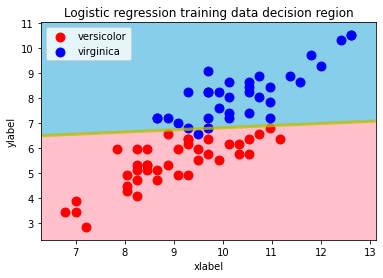

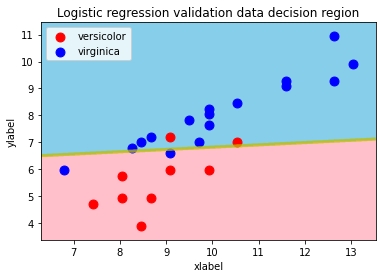

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [69]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
iris_dataset = load_iris()

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import itertools

#説明変数
iris_dataset_data = pd.DataFrame(iris_dataset.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
iris_dataset_all = pd.concat([iris_dataset_data], axis=1)
X = iris_dataset_all
# print(X)
# print(type(X))
#目的変数（花の種類）も同様にyに格納してください。
iris_dataset_target = pd.DataFrame(iris_dataset.target, columns=["Species"])
iris_dataset_all2 = pd.concat([iris_dataset_target], axis=1)
y = iris_dataset_all2

# print("sepal_lengthとpetal_lengthのデータフレーム")
x=X.loc[:,['sepal_length','petal_length']]

oldy=y[(y['Species'] == 1) | (y['Species'] == 2)]



#PandasのDataFrameをNumPyのndarrayに変換
# print("sepal_lengthとpetal_lengthのndarray")
x=x.loc[50:149,['sepal_length','petal_length']]
X = x.values
X=X.tolist()
# print(X)

#PandasのDataFrameをNumPyのndarrayに変換
# print("virgicolorとvirginicaのndarray")
oldy = oldy

y = oldy.values
# print("yの型は")
# print(type(y))
#訓練データ75%、検証データ25%として分割
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, test_size=0.25)


#標準化は「平均が0、標準偏差が1になるようにデータを加工（スケーリング）」し、正規化は「最低が0、最高が1になるようにデータを加工（スケーリング）する」モジュールと説明されています。
#標準化（standardization） と 正規化（normalization）
from sklearn.preprocessing import StandardScaler


X_train_data = X_train #"sepal_lengthとpetal_lengthの訓練データ"
scaler = StandardScaler()
scaler.fit(X_train_data)
scaler.transform(X_train_data)


X_test_data = X_test #"sepal_lengthとpetal_lengthの検証データ"
scaler = StandardScaler()
scaler.fit(X_test_data)
scaler.transform(X_test_data)

y_train_data = y_train #"virgicolorとvirginicaの訓練データ"
scaler = StandardScaler()
scaler.fit(y_train_data)
scaler.transform(y_train_data)

y_test_data = y_test #"virgicolorとvirginicaの検証データ"
scaler = StandardScaler()
scaler.fit(y_test_data)
scaler.transform(y_test_data)



#ロジスティック回帰 
#訓練データをプロット
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X2_1=scaler.transform(X_train_data)
y2_1=list(itertools.chain.from_iterable(y_train_data))
clf = LogisticRegression(random_state=0).fit(X2_1, y2_1)

model2 = clf.fit(X2_1,y2_1)
decision_region(X2_1, y2_1, model2, step=0.01, title='Logistic regression training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
X2_2=scaler.transform(X_test_data)
# print(X2_2)
y2_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region(X2_2, y2_2, model2, step=0.01, title='Logistic regression validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint

# #訓練データ75%、検証データ25%として分割
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size= 0.75, test_size=0.25)
neigh2 = LogisticRegression()
model2 = neigh2.fit(X_train2,y_train2)
predict2 = model2.predict(X_test2)
y_true_multi2=y_test2
y_pred_multi2=predict2
print(classification_report(y_true_multi2, y_pred_multi2)) #引数に入れるのは、下記でサイトで調べた


